In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

import numpy as np
import matplotlib.pyplot as plt
from scipy import special

# # plt.style.use('dark_background')
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=False, grid=True)
# jtplot.style(theme='monokai', ticks=False, grid=True)

In [26]:
def calc_CDF(samples, x):
    n_samples = len(samples)
    CDF = np.count_nonzero(samples < x[:, None], axis=1) / n_samples
    
    return CDF


def calc_inverse_func(func, x, *args, **kwargs):
    from scipy.optimize import root_scalar

    y = np.empty(x.shape)

    for idx, x_value in enumerate(x):
        # default method 'brentq'
        sol = root_scalar(lambda x: func(x) - x_value, *args, **kwargs)
        y[idx] = sol.root

    return y

CPU times: user 111 ms, sys: 0 ns, total: 111 ms
Wall time: 109 ms


array([-3.08993515,  3.08993515])

CPU times: user 142 ms, sys: 62 µs, total: 142 ms
Wall time: 139 ms


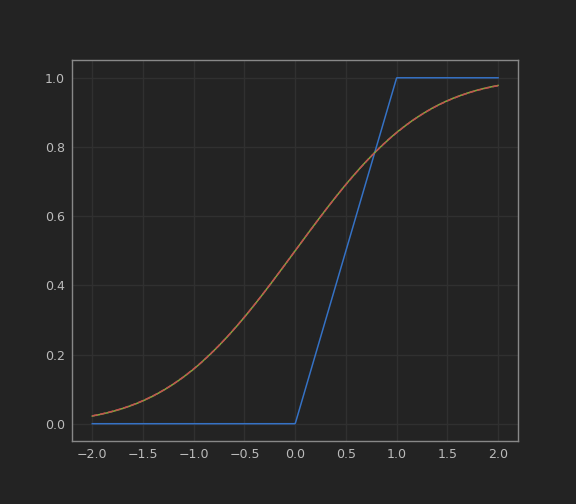

In [49]:
%%time
n_samples = 1000
U_samples = np.linspace(0, 1, n_samples)[1:-1]

std_normal_CDF = lambda x: 1 / 2 * (1 + special.erf(x / np.sqrt(2)))

std_normal_samples = %time calc_inverse_func(std_normal_CDF, U_samples, bracket=(-6, 6))


x = np.linspace(-2, 2, 1000)

plt.plot(x, calc_CDF(U_samples, x))
plt.plot(x, calc_CDF(std_normal_samples, x))
plt.plot(x, std_normal_CDF(x), '--')

display(std_normal_samples[[0, -1]])